In [2]:
import numpy as np
from scipy.fft import fft, ifft, fftshift
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import pickle
from copy import copy
%matplotlib inline

In [3]:
def xp_mat_maker(xvals, p):
    xp = np.ones((xvals.size, p+1))
    for jj in range(p):
        xp[:, jj+1] = xvals * xp[:, jj]
    return xp

In [4]:
def least_squares_solve(mat, yvals):
    u, s, vt = np.linalg.svd(mat, full_matrices=False)
    alpha = (vt.T @ np.diag(1./s) @ u.T) @ yvals.reshape(-1, 1)
    error = np.linalg.norm(mat @ alpha - yvals.reshape(-1, 1))**2./(2.*yvals.size)
    return alpha, error 

In [5]:
def least_squares_solve_w_cond(mat, yvals, lam_val):
    u, s, vt = np.linalg.svd(mat, full_matrices=False)
    regxmat = (vt.T @ np.diag(s/(s**2.+lam_val)) @ u.T)
    alpha = regxmat @ yvals.reshape(-1, 1)
    error = np.linalg.norm(mat @ alpha - yvals.reshape(-1, 1))**2./(2.*yvals.size)
    return alpha, error, regxmat

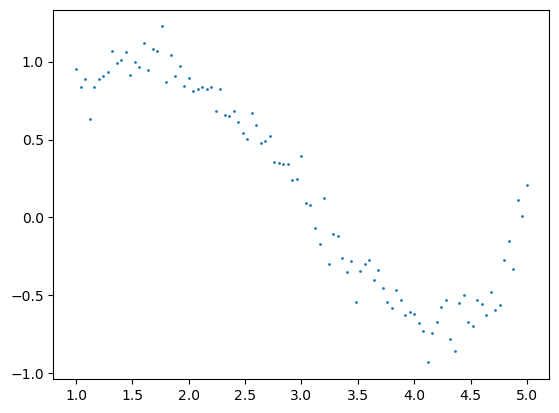

In [7]:
# equispaced data 

xvals = np.linspace(1., 5., int(1e2)+1)
sig = .1
ftrue = lambda x: x - x**3./6. + x**5./120. - x**7./(42. * 120) + x**9./(72*42*120)

yvals = ftrue(xvals) + sig*np.random.randn(xvals.size)

plt.scatter(xvals, yvals, s=1.)

In [8]:
pvals = [3, 4, 5, 6, 7]
models = [None]*len(pvals)
alphas = [None]*len(pvals)
errors = [None]*len(pvals)

for cnt, pval in enumerate(pvals):
    models[cnt] = xp_mat_maker(xvals, pval)
    alphas[cnt], errors[cnt] = least_squares_solve(models[cnt], yvals)



Model residual for p = 3: 0.00610656859588036
Condition number of model matrix is: 1506.69742057035

Model residual for p = 4: 0.005063443148831876
Condition number of model matrix is: 22617.865032989925

Model residual for p = 5: 0.0049422892986086585
Condition number of model matrix is: 356134.4401319924

Model residual for p = 6: 0.0048634429956080855
Condition number of model matrix is: 5779472.683147091

Model residual for p = 7: 0.004837291321220513
Condition number of model matrix is: 95795821.36506134



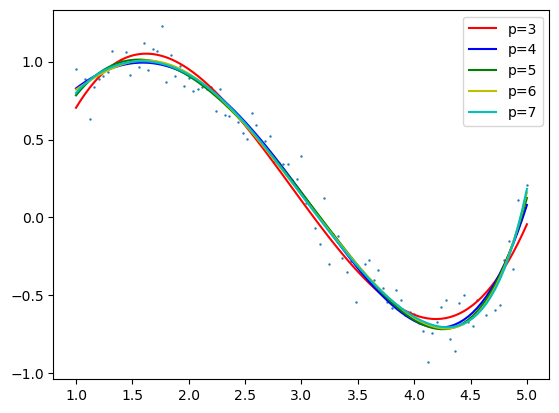

In [9]:
plt.scatter(xvals, yvals, s=.5)
colors = ['r', 'b', 'g', 'y', 'c']
for cnt, pval in enumerate(pvals):
    myfit = models[cnt] @ alphas[cnt].reshape(-1, 1)
    plt.plot(xvals, myfit, c=colors[cnt], label="p="+str(pval))
    print(f"Model residual for p = {pval}: {errors[cnt]}")
    print(f"Condition number of model matrix is: {np.linalg.cond(models[cnt])}\n")
plt.legend()

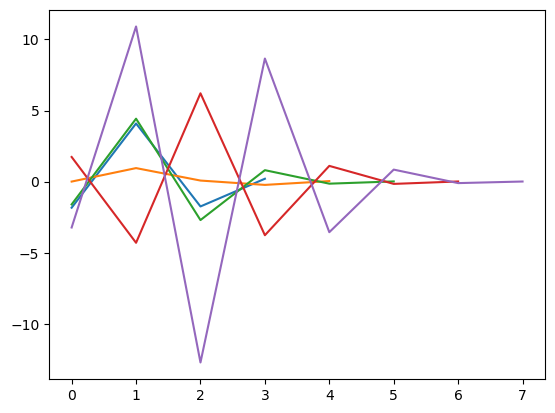

In [10]:
for jj in range(len(pvals)):
    plt.plot(alphas[jj])

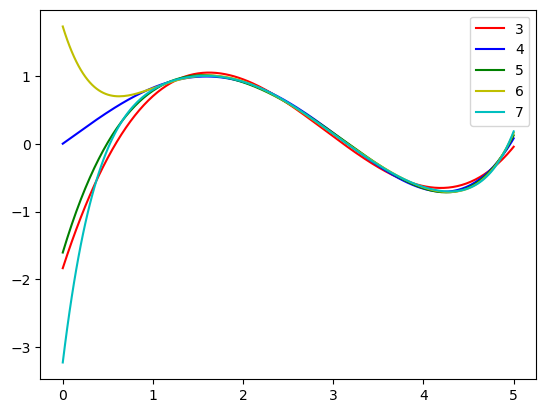

In [11]:
xfine = np.linspace(0., 5., int(2e2)+1)

for cnt, pval in enumerate(pvals):
    fine_model = xp_mat_maker(xfine, pval)
    ypred = fine_model @ alphas[cnt].reshape(-1,1)
    plt.plot(xfine, ypred, c=colors[cnt], label=str(pval))
plt.legend()


## Regularization

How to deal with increasingly poor conditioning of your model.

In [12]:
pvals = [3, 4, 5, 6, 7]
models = [None]*len(pvals)
alphas = [None]*len(pvals)
errors = [None]*len(pvals)
regmats = [None]*len(pvals)
lam_val = .1

for cnt, pval in enumerate(pvals):
    models[cnt] = xp_mat_maker(xvals, pval)
    alphas[cnt], errors[cnt], regmats[cnt] = least_squares_solve_w_cond(models[cnt], yvals, lam_val)

Model residual for p = 3: 0.008699345111115996
Condition number of model matrix is: 861.7857254791904

Model residual for p = 4: 0.00508466475954121
Condition number of model matrix is: 2346.243139425666

Model residual for p = 5: 0.0050922600535836925
Condition number of model matrix is: 16291.392844421689

Model residual for p = 6: 0.005101312178965107
Condition number of model matrix is: 61485.160191686766

Model residual for p = 7: 0.004861077729352765
Condition number of model matrix is: 340565.32368387945



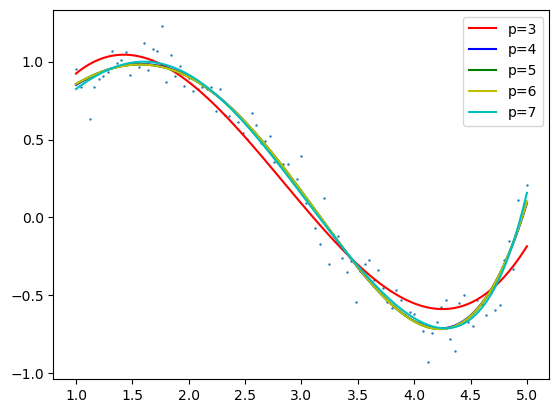

In [13]:
plt.scatter(xvals, yvals, s=.5)
colors = ['r', 'b', 'g', 'y', 'c']
for cnt, pval in enumerate(pvals):
    myfit = models[cnt] @ alphas[cnt].reshape(-1, 1)
    plt.plot(xvals, myfit, c=colors[cnt], label="p="+str(pval))
    print(f"Model residual for p = {pval}: {errors[cnt]}")
    print(f"Condition number of model matrix is: {np.linalg.cond(regmats[cnt])}\n")
plt.legend()

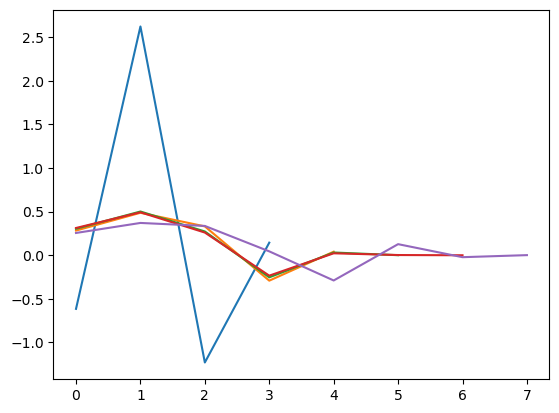

In [14]:
for jj in range(len(pvals)):
    plt.plot(alphas[jj])

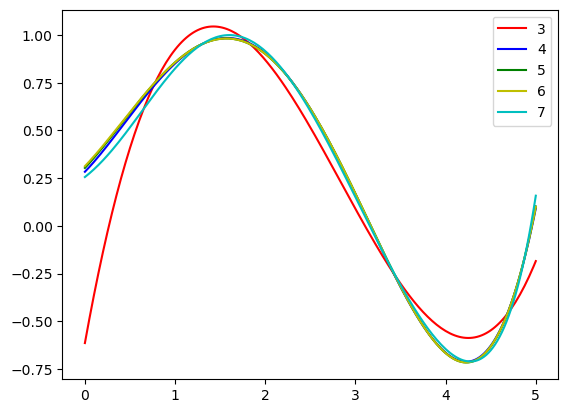

In [15]:
xfine = np.linspace(0., 5., int(2e2)+1)

for cnt, pval in enumerate(pvals):
    fine_model = xp_mat_maker(xfine, pval)
    ypred = fine_model @ alphas[cnt].reshape(-1,1)
    plt.plot(xfine, ypred, c=colors[cnt], label=str(pval))
plt.legend()
